# Завдання

Можна використовувати бібліотеку PIL або бібліотеку OpenCV.

1. Створіть функцію для зчитування зображення з диску та його відображення на екрані.

2. Створіть функцію для збереження зображення на диск.

3. Створіть функцію для реалізації наступних піксельних операцій:

+ зміна контрастності (задання коефіцієнту контрастності та яскравості);
+ зміна яскравості (задання коефіцієнту яскравості);
+ зміна насиченості (задання коефіцієнту насиченості);
+ зміна розміру зображення (задання нової ширини та висоти);
+ обрізання зображення (задання координат початку та кінця обрізання);
+ поворот зображення на заданий кут (задання кута повороту в градусах).

**Створюємо функцію для зчитування зображення з диску та його відображення на екрані**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_image(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    return img

In [3]:
def show_image(file):
    img = load_image(file)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img_RGB)
    return plt.show()

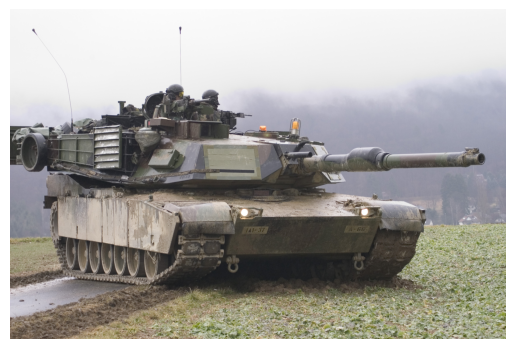

In [4]:
show_image("TA.jpg")

**Створюємо функцію для збереження зображення на диск.**

In [5]:
def save_image(filename, image):
    saved_image = cv2.imwrite(filename, image)
    print(f"saved as {filename}")
    return None

**Зміна контрастності (задання коефіцієнту контрастності та яскравості**

In [6]:
def adjust_contrast(file, contrast, brightness):
    img = load_image(file)
    img_new = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)
    filename = f"contrast_adjusted_{file}"
    save_image(filename, img_new)
    return show_image(filename)

saved as contrast_adjusted_TA.jpg


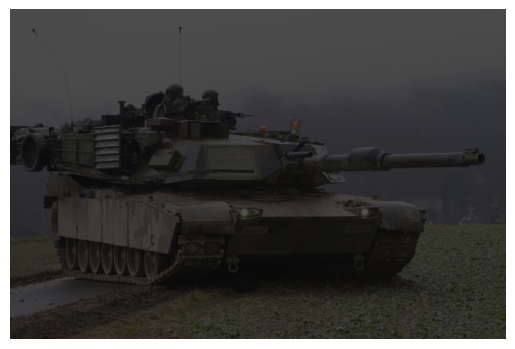

In [7]:
adjust_contrast("TA.jpg", 0.3, 1)

**Зміна яскравості (задання коефіцієнту яскравості)**

In [9]:
def adjust_brightness(file, brightness):
    img = load_image(file)
    img_new = cv2.convertScaleAbs(img, beta=brightness)
    filename = f"brightness_adjusted_{file}"
    save_image(filename, img_new)
    return show_image(filename)

saved as brightness_adjusted_TA.jpg


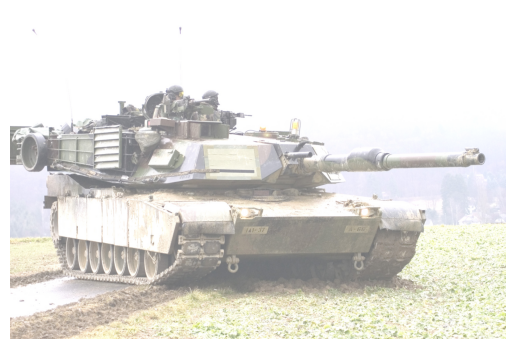

In [10]:
adjust_brightness("TA.jpg", 90)

**Зміна насиченості (задання коефіцієнту насиченості)**

In [11]:
def adjust_saturation(file, saturation):
    img = load_image(file)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_img)
    s = cv2.convertScaleAbs(s, alpha=saturation)
    hsv_img = cv2.merge([h, s, v])
    img_new = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)
    filename = f"saturation_adjusted_{file}"
    save_image(filename, img_new)
    return show_image(filename)

saved as saturation_adjusted_TA.jpg


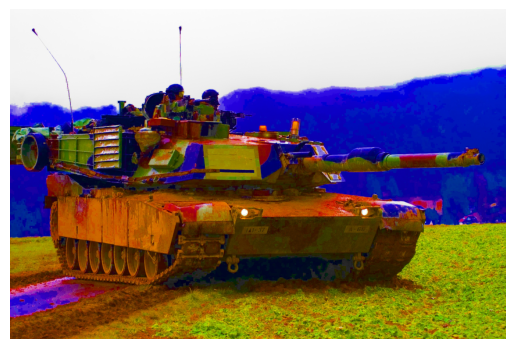

In [12]:
adjust_saturation("TA.jpg", 20)

**Зміна розміру зображення (задання нової ширини та висоти)**

In [13]:
def resize_image(file, new_width, new_height):
    img = load_image(file)
    img_new = cv2.resize(img, (new_width, new_height))
    filename = f"resized_{new_width}x{new_height}_{file}"
    save_image(filename, img_new)
    return show_image(filename)

saved as resized_250x250_TA.jpg


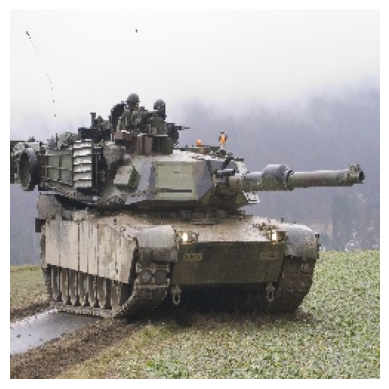

In [14]:
resize_image("TA.jpg", 250, 250)

**Обрізання зображення (задання координат початку та кінця обрізання)**

In [15]:
def crop_image(file, x1, y1, x2, y2):
    img = load_image(file)
    img_new = img[y1:y2, x1:x2]
    filename = f"cropped_{file}"
    save_image(filename, img_new)
    return show_image(filename)

saved as cropped_TA.jpg


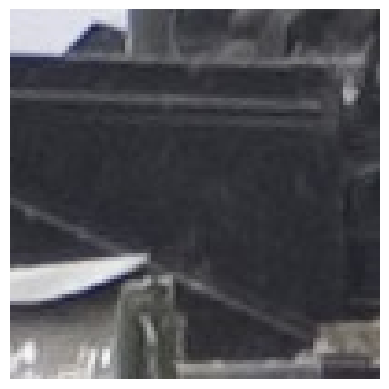

In [16]:
crop_image("TA.jpg", 600, 600, 700, 700)

**Поворот зображення на заданий кут (задання кута повороту в градусах)**

In [17]:
def rotate_image(file, angle):
    img = load_image(file)
    height, width = img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    img_new = cv2.warpAffine(img, rotation_matrix, (width, height))
    filename = f"rotated_{file}"
    save_image(filename, img_new)
    return show_image(filename)

saved as rotated_TA.jpg


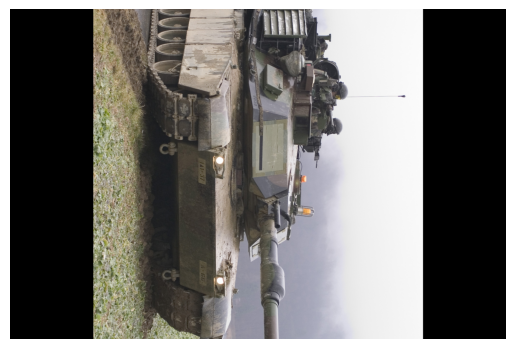

In [18]:
rotate_image("TA.jpg", 270)